In [1]:
import pandas as pd

# Web scraping - pridobivanje podatkov s spleta


## What Is Web Scraping?

<img class="progressiveMedia-image js-progressiveMedia-image" data-src="https://cdn-images-1.medium.com/max/1600/1*GOyqaID2x1N5lD_rhTDKVQ.png" src="https://cdn-images-1.medium.com/max/1600/1*GOyqaID2x1N5lD_rhTDKVQ.png">

### Why Web Scraping for Data Science?

## Network complexity

## HTTP

## HTTP in Python: The Requests Library

[Requests: HTTP for Humans](https://2.python-requests.org/en/master/)

In [2]:
# robots.txt pove, kakšna je politika glede scrapanja te strani
# nekatere knjižnice avtomatizirajo sprehajanje skozi stran in izpolnjevanje form (Selenium)
# 
# 

In [4]:
# najprej bomo iz .html fajla dobili dataframe
# uporabimo knjižnico Requests

In [5]:
import requests

In [6]:
url = 'http://example.com/'

In [7]:
r = requests.get(url)

In [8]:
r

<Response [200]>

In [9]:
type(r)

requests.models.Response

In [11]:
# da izpišemo HTML kodo strani, rečemo takole:
r.text

'<!doctype html>\n<html>\n<head>\n    <title>Example Domain</title>\n\n    <meta charset="utf-8" />\n    <meta http-equiv="Content-type" content="text/html; charset=utf-8" />\n    <meta name="viewport" content="width=device-width, initial-scale=1" />\n    <style type="text/css">\n    body {\n        background-color: #f0f0f2;\n        margin: 0;\n        padding: 0;\n        font-family: "Open Sans", "Helvetica Neue", Helvetica, Arial, sans-serif;\n        \n    }\n    div {\n        width: 600px;\n        margin: 5em auto;\n        padding: 50px;\n        background-color: #fff;\n        border-radius: 1em;\n    }\n    a:link, a:visited {\n        color: #38488f;\n        text-decoration: none;\n    }\n    @media (max-width: 700px) {\n        body {\n            background-color: #fff;\n        }\n        div {\n            width: auto;\n            margin: 0 auto;\n            border-radius: 0;\n            padding: 1em;\n        }\n    }\n    </style>    \n</head>\n\n<body>\n<div>\n

In [12]:
r.status_code

200

In [14]:
# besedni opis posamezne status kode
r.reason

'OK'

In [15]:
# respons headersi - kaj pride še zraven HTML-ja
r.headers

{'Content-Encoding': 'gzip', 'Cache-Control': 'max-age=604800', 'Content-Type': 'text/html; charset=UTF-8', 'Date': 'Wed, 22 May 2019 17:40:51 GMT', 'Etag': '"1541025663+gzip"', 'Expires': 'Wed, 29 May 2019 17:40:51 GMT', 'Last-Modified': 'Fri, 09 Aug 2013 23:54:35 GMT', 'Server': 'ECS (dcb/7EEA)', 'Vary': 'Accept-Encoding', 'X-Cache': 'HIT', 'Content-Length': '606'}

In [16]:
r.request

<PreparedRequest [GET]>

In [18]:
r.request.headers

{'User-Agent': 'python-requests/2.21.0', 'Accept-Encoding': 'gzip, deflate', 'Accept': '*/*', 'Connection': 'keep-alive'}

## HTML and CSS

<img class="progressiveMedia-image js-progressiveMedia-image" data-src="https://cdn-images-1.medium.com/max/1600/1*x9mxFBXnLU05iPy19dGj7g.png" src="https://cdn-images-1.medium.com/max/1600/1*x9mxFBXnLU05iPy19dGj7g.png">

### Hypertext Markup Language: HTML

Link strani: https://en.wikipedia.org/w/index.php?title=List_of_Game_of_Thrones_episodes&oldid=802553687

In [19]:
# najprej downloadamo zgornjo spletno stran


In [2]:
import requests


In [3]:
url_got = 'https://en.wikipedia.org/w/index.php?title=List_of_Game_of_Thrones_episodes&oldid=802553687'

In [4]:
r = requests.get(url_got)

In [5]:
r.text[:1000]

'<!DOCTYPE html>\n<html class="client-nojs" lang="en" dir="ltr">\n<head>\n<meta charset="UTF-8"/>\n<title>List of Game of Thrones episodes - Wikipedia</title>\n<script>document.documentElement.className=document.documentElement.className.replace(/(^|\\s)client-nojs(\\s|$)/,"$1client-js$2");RLCONF={"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"List_of_Game_of_Thrones_episodes","wgTitle":"List of Game of Thrones episodes","wgCurRevisionId":898999050,"wgRevisionId":802553687,"wgArticleId":31120069,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Articles containing potentially dated statements from August 2017","All articles containing potentially dated statements","Official website not in Wikidata","Featured lists","Game of Thrones episodes","Lists of American drama television series episodes","Lists of fantasy television series episodes"],"wgBreakFrames":!1,"wgPageContentLanguage"

- `<p>...</p>` to enclose a paragraph;
- `<br>` to set a line break;
- `<table>...</table>` to start a table block, inside; `<tr>...<tr/>` is used for the rows; and `<td>...</td>` cells;
- `<img>` for images;
- `<h1>...</h1> to <h6>...</h6>` for headers;
- `<div>...</div>` to indicate a “division” in an HTML document, basically used to group a set of elements;
- `<a>...</a>` for hyperlinks;
- `<ul>...</ul>, <ol>...</ol>` for unordered and ordered lists respectively; inside of these, `<li>...</li>` is used for each list item.

## Using Your Browser as a Development Tool

## The Beautiful Soup Library

In [6]:
html_content = r.text

> **[beautifulsoup4](https://www.crummy.com/software/BeautifulSoup/bs4/doc/)**: Beautiful Soup tries to organize complexity: it helps to parse, structure and organize the oftentimes very messy web by fixing bad HTML and presenting us with an easy-to-work-with Python structure.

In [7]:
from bs4 import BeautifulSoup


In [8]:
html_soup = BeautifulSoup(html_content, 'html.parser')

In [9]:
# ponavadi imamo več parserjev, da preparsamo stran

In Python, multiple parsers exist to do so:
- `html.parser`: a built-in Python parser that is decent (especially when using recent versions of Python 3) and requires no extra installation.
- `lxml`: which is very fast but requires an extra installation.
- `html5lib`: which aims to parse web page in exactly the same way as a web browser does, but is a bit slower.

In [10]:
# mi bomo uporabili prvega (default). Ker ni vedno ta default povsod, je vedno dobro navesti parser

- `find(name, attrs, recursive, string, **keywords)`
- `find_all(name, attrs, recursive, string, limit, **keywords)`

In [11]:
# glavni dve funkciji sta:
# find (najde samo prvi element, ki pride na vrsto)
# find_all najde vse elemente

In [12]:
#iskanje po tagu
html_soup.find('h1')

<h1 class="firstHeading" id="firstHeading" lang="en">List of <i>Game of Thrones</i> episodes</h1>

In [13]:
# iskanje po atributu
html_soup.find('',{'id': 'firstHeading'})

<h1 class="firstHeading" id="firstHeading" lang="en">List of <i>Game of Thrones</i> episodes</h1>

In [14]:
all_h1 = html_soup.find_all('h1')

In [15]:
len(all_h1)

1

In [16]:
all_h2 = html_soup.find_all('h2')

In [17]:
len(all_h2)

8

In [18]:
#loopanje skozi tage
for found in html_soup.find_all('h2'):
    print(found)

<h2>Contents</h2>
<h2><span class="mw-headline" id="Series_overview">Series overview</span></h2>
<h2><span class="mw-headline" id="Episodes">Episodes</span></h2>
<h2><span class="mw-headline" id="Home_media_releases">Home media releases</span></h2>
<h2><span class="mw-headline" id="Ratings">Ratings</span></h2>
<h2><span class="mw-headline" id="References">References</span></h2>
<h2><span class="mw-headline" id="External_links">External links</span></h2>
<h2>Navigation menu</h2>


In [19]:
first_h1 = html_soup.find('h1')

In [20]:
first_h1

<h1 class="firstHeading" id="firstHeading" lang="en">List of <i>Game of Thrones</i> episodes</h1>

In [22]:
# Izpiše tag tega elementa
first_h1.name

'h1'

In [25]:
# kaj se nahaja znotraj first_h1
first_h1.contents

['List of ', <i>Game of Thrones</i>, ' episodes']

In [27]:
#  kaj je v h1 ampak sammo tekst
first_h1.text

'List of Game of Thrones episodes'

In [28]:
# isto dobimo tudi tako:
first_h1.get_text()

'List of Game of Thrones episodes'

In [30]:
# dictionary atributov
first_h1.attrs

{'id': 'firstHeading', 'class': ['firstHeading'], 'lang': 'en'}

In [31]:
# če hočemo samo en atribut:
first_h1.attrs['id']


'firstHeading'

In [32]:
#isto
first_h1['id']

'firstHeading'

In [34]:
# isto
first_h1.get('id')

'firstHeading'

In [35]:
#zelo pogost atribut je 'class'
# problem je, da je v Pythonu "class" že rezervirana beseda
# zato pišemo "class_"

In [38]:
# npr. radi bi našli vse vire, ki imajo class="citation" ( tag "cite")
cites = html_soup.find_all('cite', class_='citation', limit = 4)



In [41]:
cites

[<cite class="citation web">Fowler, Matt (April 8, 2011). <a class="external text" href="http://tv.ign.com/articles/116/1160215p1.html" rel="nofollow">"Game of Thrones: "Winter is Coming" Review"</a>. <a href="/wiki/IGN" title="IGN">IGN</a>. <a class="external text" href="https://web.archive.org/web/20120817073932/http://tv.ign.com/articles/116/1160215p1.html" rel="nofollow">Archived</a> from the original on August 17, 2012<span class="reference-accessdate">. Retrieved <span class="nowrap">September 22,</span> 2016</span>.</cite>,
 <cite class="citation news">Fleming, Michael (January 16, 2007). <a class="external text" href="http://www.variety.com/article/VR1117957532.html?categoryid=14&amp;cs=1" rel="nofollow">"HBO turns <i>Fire</i> into fantasy series"</a>. <i><a href="/wiki/Variety_(magazine)" title="Variety (magazine)">Variety</a></i>. <a class="external text" href="https://web.archive.org/web/20120516224747/http://www.variety.com/article/VR1117957532?refCatId=14" rel="nofollow">A

In [42]:
# to bi radi malo uredili. Naj se izpiše samo vsebina, nato vejica in pripadajoči link
# najprej samo za enega
cites[0].get_text()

'Fowler, Matt (April 8, 2011). "Game of Thrones: "Winter is Coming" Review". IGN. Archived from the original on August 17, 2012. Retrieved September 22, 2016.'

In [45]:
cites[0].find('a').get('href')

'http://tv.ign.com/articles/116/1160215p1.html'

In [49]:
#zdaj to sestavimo v for zanko
for citation in cites:
    print('--->', citation.get_text())
    print(citation.find('a').get('href'))
    print()

---> Fowler, Matt (April 8, 2011). "Game of Thrones: "Winter is Coming" Review". IGN. Archived from the original on August 17, 2012. Retrieved September 22, 2016.
http://tv.ign.com/articles/116/1160215p1.html

---> Fleming, Michael (January 16, 2007). "HBO turns Fire into fantasy series". Variety. Archived from the original on May 16, 2012. Retrieved September 3, 2016.
http://www.variety.com/article/VR1117957532.html?categoryid=14&cs=1

---> "Game of Thrones". Emmys.com. Retrieved September 17, 2016.
http://www.emmys.com/shows/game-thrones

---> Roberts, Josh (April 1, 2012). "Where HBO's hit 'Game of Thrones' was filmed". USA Today. Archived from the original on April 1, 2012. Retrieved March 8, 2013.
https://web.archive.org/web/20120401123724/http://travel.usatoday.com/destinations/story/2012-04-01/Where-the-HBO-hit-Game-of-Thrones-was-filmed/53876876/1



In [50]:
### Parsanje tabel

In [51]:
# na strani so tabele z epizodami. Vse te tabele bi dali v en sam pandas dataframe
html_soup.text[:1000]

'\n\n\n\nList of Game of Thrones episodes - Wikipedia\ndocument.documentElement.className=document.documentElement.className.replace(/(^|\\s)client-nojs(\\s|$)/,"$1client-js$2");RLCONF={"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"List_of_Game_of_Thrones_episodes","wgTitle":"List of Game of Thrones episodes","wgCurRevisionId":898999050,"wgRevisionId":802553687,"wgArticleId":31120069,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Articles containing potentially dated statements from August 2017","All articles containing potentially dated statements","Official website not in Wikidata","Featured lists","Game of Thrones episodes","Lists of American drama television series episodes","Lists of fantasy television series episodes"],"wgBreakFrames":!1,"wgPageContentLanguage":"en","wgPageContentModel":"wikitext","wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefa

In [52]:
# treba je najti neko lastnost, ki jo imajo samo tabele. To je npr. tag "table"
# nato se moramo sprehoditi skozi vse tabele in znotraj tabel skozi vrstice in nato skozi celice
episodes = []

In [53]:
ep_tables = html_soup.find_all('table', class_="wikiepisodetable")

In [54]:
len(ep_tables)

7

In [63]:
for table in ep_tables[0]:
    headers = []
    rows = table.find_all('tr')
    for header in table.find('tr').find_all('th'):
        headers.append(header.text)
    for row in rows[1:]:
        values = []
        for col in row.find_all(['th','td']):
            values.append(col.text)
        if values:
            episode_dict = {headers[i]: values[i] for i in range(len(values))}
            episodes.append(episode_dict)
        

In [64]:
episodes[0]

{'No.overall': '1',
 'No. inseason': '1',
 'Title': '"Winter Is Coming"',
 'Directed by': 'Tim Van Patten',
 'Written by': 'David Benioff & D. B. Weiss',
 'Original air date': 'April\xa017,\xa02011\xa0(2011-04-17)',
 'U.S. viewers(millions)': '2.22[20]'}

In [67]:
for episode in episodes[:3]:
    print(episode)

{'No.overall': '1', 'No. inseason': '1', 'Title': '"Winter Is Coming"', 'Directed by': 'Tim Van Patten', 'Written by': 'David Benioff & D. B. Weiss', 'Original air date': 'April\xa017,\xa02011\xa0(2011-04-17)', 'U.S. viewers(millions)': '2.22[20]'}
{'No.overall': '2', 'No. inseason': '2', 'Title': '"The Kingsroad"', 'Directed by': 'Tim Van Patten', 'Written by': 'David Benioff & D. B. Weiss', 'Original air date': 'April\xa024,\xa02011\xa0(2011-04-24)', 'U.S. viewers(millions)': '2.20[21]'}
{'No.overall': '3', 'No. inseason': '3', 'Title': '"Lord Snow"', 'Directed by': 'Brian Kirk', 'Written by': 'David Benioff & D. B. Weiss', 'Original air date': 'May\xa01,\xa02011\xa0(2011-05-01)', 'U.S. viewers(millions)': '2.44[22]'}


In [68]:
pd.DataFrame(episodes)

,Directed by,No. inseason,No.overall,Original air date,Title,U.S. viewers(millions),Written by
0,Tim Van Patten,1,1,"April 17, 2011 (2011-04-17)","""Winter Is Coming""",2.22[20],David Benioff & D. B. Weiss
1,Tim Van Patten,2,2,"April 24, 2011 (2011-04-24)","""The Kingsroad""",2.20[21],David Benioff & D. B. Weiss
2,Brian Kirk,3,3,"May 1, 2011 (2011-05-01)","""Lord Snow""",2.44[22],David Benioff & D. B. Weiss
3,Brian Kirk,4,4,"May 8, 2011 (2011-05-08)","""Cripples, Bastards, and Broken Things""",2.45[23],Bryan Cogman
4,Brian Kirk,5,5,"May 15, 2011 (2011-05-15)","""The Wolf and the Lion""",2.58[24],David Benioff & D. B. Weiss
5,Daniel Minahan,6,6,"May 22, 2011 (2011-05-22)","""A Golden Crown""",2.44[25],Story by : David Benioff & D. B. Weiss Telepla...
6,Daniel Minahan,7,7,"May 29, 2011 (2011-05-29)","""You Win or You Die""",2.40[26],David Benioff & D. B. Weiss
7,Daniel Minahan,8,8,"June 5, 2011 (2011-06-05)","""The Pointy End""",2.72[27],George R. R. Martin
8,Alan Taylor,9,9,"June 12, 2011 (2011-06-12)","""Baelor""",2.66[28],David Benioff & D. B. Weiss
9,Alan Taylor,10,10,"June 19, 2011 (2011-06-19)","""Fire and Blood""",3.04[29],David Benioff & D. B. Weiss


In [69]:
# ni preveč dela, ampak še vedno se ne splača vedno
# kdaj imajo spletne strani že narejen izvoz tabel v obliki csv
# ročno parsamo takrat, ko ne gre drugače
# 

## Web APIs

### Primer uporabe APIja

https://github.com/HackerNews/API

In [70]:
# če obstaja API, uporabimo kar to
# velikokrat so API-ji plačljivi
# včasih ima brezplačna verzija API-ja manj podatkov od plačljive


In [71]:
articles = []

In [73]:
#osnovni del URL-ja, brez dodatnih parametrov. Te dodajamo naknadno
url = 'https://hacker-news.firebaseio.com/v0'

In [76]:
# top stories
top_stories = requests.get(url + '//topstories.json')

In [78]:
# dobili smo ID-je top zgodb (kot tudi piše v dokumentaciji na zgornjem linku)
top_stories.text

'[20019647,20019874,20019206,20019877,20021568,20019975,20014281,20022186,20020282,20021289,20022086,20019355,20020644,20021615,20014303,20020837,20014330,20015581,20021521,20014694,20014230,20014372,20012499,20017854,20019258,20015968,20020095,20014426,20018535,20012953,20015109,20017506,20021159,20013533,20008694,20017646,20011937,20012231,20016964,20016177,20014030,20017593,20016848,20014002,20016982,20015775,20017373,20016138,20014691,20009825,20016264,20015633,20010510,20012687,20014388,20010881,20011521,20018934,20016340,20016728,20008908,20008943,20017104,20013716,20016181,20014184,20017448,20016997,20013616,20015944,20019487,20017493,20014233,20016986,20008466,20016700,20020542,20007077,20015760,20017595,20016126,20003892,20013598,20007638,20013662,20013732,20009017,19998806,20021999,20010812,20013588,20017061,19997813,20015638,20013720,20020210,20007752,20013751,20009037,20014204,20008230,20015406,20017449,20001151,20012977,20011768,20013486,20015724,20016972,20018661,20006162

In [79]:
# request v json formatu
top_stories = top_stories.json()

In [80]:
# prenesli bi si prvih 5 zgodb (od prvih 5 ID-jev)

In [82]:
for story_id in top_stories[:5]:
    r = requests.get(url + f'/item/{story_id}.json')
    story_dict = r.json()
    articles.append(story_dict)

In [83]:
articles[0]

{'by': 'ChuckMcM',
 'descendants': 107,
 'id': 20019647,
 'kids': [20019656,
  20021798,
  20019813,
  20021427,
  20020785,
  20020158,
  20020261,
  20020167,
  20019727,
  20021141,
  20019699],
 'score': 224,
 'time': 1558934592,
 'title': 'Arm announces its new premium CPU and GPU designs',
 'type': 'story',
 'url': 'https://techcrunch.com/2019/05/26/arm-announces-its-new-premium-cpu-and-gpu-designs/'}

In [84]:
articles[1]['title']

'On SQS'

In [86]:
for article in articles:
    print(article['title'])

Arm announces its new premium CPU and GPU designs
On SQS
AMD Ryzen 3000 announced
Show HN: Interactively select the quality and format for youtube-dl
Chinese developers fear the tech war will cost them access to GitHub


### Import data from web - pandas

##### [Odprti podatki Slovenije](https://podatki.gov.si/)


Na portalu OPSI boste našli vse od podatkov, orodij, do koristnih virov, s katerimi boste lahko razvijali spletne in mobilne aplikacije, oblikovali lastne infografike in drugo

Primer: https://support.spatialkey.com/spatialkey-sample-csv-data/

In [87]:
# csv z interneta direktno uvozimo v dataframe
data = pd.read_csv('http://samplecsvs.s3.amazonaws.com/Sacramentorealestatetransactions.csv')

In [88]:
data.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768


## Web Scraping using pandas

> Spletna stran: https://www.fdic.gov/bank/individual/failed/banklist.html

`pandas.read_html: ` Read HTML tables into a list of DataFrame objects. -> [Dokumentacija](https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.read_html.html)



In [89]:
# read_html je zelo močna funkcija od pandasa. Preparsa tabelo iz html strani
tables = pd.read_html('https://www.fdic.gov/bank/individual/failed/banklist.html')

In [95]:
#tables je kar seznam tabel
len(tables)

1

In [96]:
banks = tables[0]

In [98]:
#c pandas je celo upošteval paginacijo na tabeli in jo je celo uvozil
banks.head()

,Bank Name,City,ST,CERT,Acquiring Institution,Closing Date,Updated Date
0,Washington Federal Bank for Savings,Chicago,IL,30570,Royal Savings Bank,"December 15, 2017","February 1, 2019"
1,The Farmers and Merchants State Bank of Argonia,Argonia,KS,17719,Conway Bank,"October 13, 2017","February 21, 2018"
2,Fayette County Bank,Saint Elmo,IL,1802,"United Fidelity Bank, fsb","May 26, 2017","January 29, 2019"
3,"Guaranty Bank, (d/b/a BestBank in Georgia & Mi...",Milwaukee,WI,30003,First-Citizens Bank & Trust Company,"May 5, 2017","March 22, 2018"
4,First NBC Bank,New Orleans,LA,58302,Whitney Bank,"April 28, 2017","January 29, 2019"


In [101]:
close_timestamps = pd.to_datetime(banks['Closing Date'])

In [102]:
close_timestamps.dt.year.value_counts()

2010    157
2009    140
2011     92
2012     51
2008     25
2013     24
2014     18
2002     11
2017      8
2015      8
2016      5
2004      4
2001      4
2007      3
2003      3
2000      2
Name: Closing Date, dtype: int64

## Primeri

### Scraping and Visualizing IMDB Ratings

Stran: http://www.imdb.com/title/tt0944947/episodes

In [103]:
import requests
from bs4 import BeautifulSoup
url = 'http://www.imdb.com/title/tt0944947/episodes'

In [104]:
# zanima nas število zvezdic za vse epizode v vseh sezonah

In [106]:
episodes = []
rankings = []

In [113]:
for season in range(1,9):
    r = requests.get(url, params = {'season': season})
    soup = BeautifulSoup(r.text, 'html.parser')
    listing = soup.find('div', class_='eplist')
    #elemente bomo oštevilčili, da bomo potem imeli tudi oštevilčene epizode in sezone
    for epnr, div in enumerate(listing.find_all('div', recursive = False)):
        episode = f'{season}.{epnr + 1}'
        rating_el = div.find(class_ = 'ipl-rating-star__rating')
        print(episode,rating_el)
        print('-----------------')
        rating = float(rating_el.get_text(strip=True))
        episodes.append(episode)
        rankings.append(rating)

1.1 <span class="ipl-rating-star__rating">9.1</span>
-----------------
1.2 <span class="ipl-rating-star__rating">8.8</span>
-----------------
1.3 <span class="ipl-rating-star__rating">8.7</span>
-----------------
1.4 <span class="ipl-rating-star__rating">8.8</span>
-----------------
1.5 <span class="ipl-rating-star__rating">9.1</span>
-----------------
1.6 <span class="ipl-rating-star__rating">9.2</span>
-----------------
1.7 <span class="ipl-rating-star__rating">9.3</span>
-----------------
1.8 <span class="ipl-rating-star__rating">9.1</span>
-----------------
1.9 <span class="ipl-rating-star__rating">9.6</span>
-----------------
1.10 <span class="ipl-rating-star__rating">9.5</span>
-----------------
2.1 <span class="ipl-rating-star__rating">8.9</span>
-----------------
2.2 <span class="ipl-rating-star__rating">8.6</span>
-----------------
2.3 <span class="ipl-rating-star__rating">8.9</span>
-----------------
2.4 <span class="ipl-rating-star__rating">8.9</span>
-----------------
2.5 <

<BarContainer object of 219 artists>

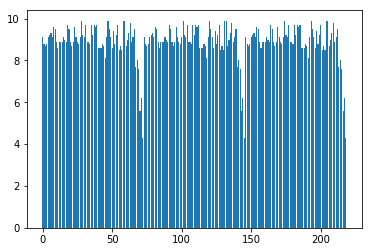

In [115]:
import matplotlib.pylab as plt
plt.figure()
positions = [a for a in range(len(rankings))]
plt.bar(positions, rankings, align = 'center')

### Scraping Fast Track data

Stran: https://www.fasttrack.co.uk/league-tables/tech-track-100/league-table/

In [116]:
# import libraries
from bs4 import BeautifulSoup
import requests
import csv

In [117]:
# specify the url
urlpage =  'http://www.fasttrack.co.uk/league-tables/tech-track-100/league-table/'

In [125]:
#najprej request na stran
page = requests.get(urlpage)

In [126]:
soup = BeautifulSoup(page.text, 'html.parser')

In [127]:
soup

<!-- Template Name: League Table page
-->
<!DOCTYPE html>

<!--[if lt IE 7 ]> <html class="ie ie6 no-js" lang="en-GB"> <![endif]-->
<!--[if IE 7 ]>    <html class="ie ie7 no-js" lang="en-GB"> <![endif]-->
<!--[if IE 8 ]>    <html class="ie ie8 no-js" lang="en-GB"> <![endif]-->
<!--[if IE 9 ]>    <html class="ie ie9 no-js" lang="en-GB"> <![endif]-->
<!--[if gt IE 9]><!-->
<html class="no-js" lang="en-GB">
<!--<![endif]-->
<!-- the "no-js" class is for Modernizr. -->
<head id="live2-fasttrack-com"><link data-minify="1" href="https://www.fasttrack.co.uk/wp-content/cache/min/1/ab9ddba4334c4be39326abf47e9c4d3f.css" rel="stylesheet"/>
<meta charset="utf-8"/>
<!-- Always force latest IE rendering engine (even in intranet) & Chrome Frame -->
<meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
<title>
        League table - Fast Track    </title>
<meta content="League table - Fast Track" name="title"/>
<meta content="" name="description"/>
<meta content="" name="keyword"/>
<meta con

In [128]:
table = soup.find('table', class_ = 'tableSorter')

In [130]:
len(table)

3

In [131]:
#prva vrstica - prvi TR
results = table.find_all('tr')

In [132]:
print('Number of rows: ', len(results))

Number of rows:  101


In [133]:
results[0]

<tr>
<th>Rank</th>
<th>Company</th>
<th class="">Location</th>
<th class="no-word-wrap">Year end</th>
<th class="" style="text-align:right;">Annual sales rise over 3 years</th>
<th class="" style="text-align:right;">Latest sales £000s</th>
<th class="" style="text-align:right;">Staff</th>
<th class="">Comment</th>
<!--				<th>FYE</th>-->
</tr>

In [134]:
# najprej naredimo header list z vsemi headerji

In [135]:
rows = []

for row in results[0].find_all('th'):
    rows.append(row.contents[0])

In [136]:
rows

['Rank',
 'Company',
 'Location',
 'Year end',
 'Annual sales rise over 3 years',
 'Latest sales £000s',
 'Staff',
 'Comment']

In [137]:
# naredimo listo za podatke

In [139]:
rows = []
rows.append(['rank','Company Name','Webpage','Description','Location','Year end',
             'Annual sales rise over 3 years','Sales €000s','Staff','Comments'])

In [140]:
# za vsak row, ki ga najdemo, dodamo podatke

In [141]:
#sprehodimo se po vseh td-jih
for result in results:
    data = result.find_all('td')
    if len(data) == 0:
        continue

In [142]:
data

[<td>100</td>,
 <td><a href="https://www.fasttrack.co.uk/company_profile/brompton-technology/"><span class="company-name">Brompton Technology</span></a>Video technology provider</td>,
 <td>West London</td>,
 <td>Aug-17</td>,
 <td style="text-align:right;">50.17%</td>,
 <td style="text-align:right;">*5,250</td>,
 <td style="text-align:right;">27</td>,
 <td>Its technology is used in high-profile events such as the Oscars</td>]

In [143]:
# write columns to variables
rank = data[0].getText()
company = data[1].getText()
location = data[2].getText()
yearend = data[3].getText()
salesrise = data[4].getText()
sales = data[5].getText()
staff = data[6].getText()
comments = data[7].getText()

In [144]:
rank


'100'

In [145]:
company

'Brompton TechnologyVideo technology provider'

In [146]:
sales

'*5,250'

In [148]:
# ni nam všeč to, kar je v "company", ker je skupaj ime firme in opis
# sta pa v HTML ta dva dela teksta v ločenih classih, tako jih bomo ločili


In [149]:
data

[<td>100</td>,
 <td><a href="https://www.fasttrack.co.uk/company_profile/brompton-technology/"><span class="company-name">Brompton Technology</span></a>Video technology provider</td>,
 <td>West London</td>,
 <td>Aug-17</td>,
 <td style="text-align:right;">50.17%</td>,
 <td style="text-align:right;">*5,250</td>,
 <td style="text-align:right;">27</td>,
 <td>Its technology is used in high-profile events such as the Oscars</td>]

In [152]:
companyname = data[1].find('span', class_ = 'company-name').getText()

In [153]:
companyname

'Brompton Technology'

In [154]:
# trik: 
description = company.replace(companyname, '')

In [155]:
description

'Video technology provider'

In [156]:
sales

'*5,250'

In [157]:
# radi bi se znebili zvezdice

In [160]:
sales.strip('*').strip('†').replace(',','')

'5250'

In [161]:
# kako dobimo spletno stran


In [162]:
data[1]

<td><a href="https://www.fasttrack.co.uk/company_profile/brompton-technology/"><span class="company-name">Brompton Technology</span></a>Video technology provider</td>

In [163]:
url = data[1].find('a').get('href')

In [164]:
url

'https://www.fasttrack.co.uk/company_profile/brompton-technology/'

In [165]:
page = requests.get(url)

In [166]:
soup = BeautifulSoup(page.text, 'html.parser')

In [168]:
#nimajo vse strani vpisanega websitea
# ko pa je, je to zadnji tr
try:
    tableRow = soup.find('table').find_all('tr')[-1]
    webpage = tableRow.find('a').get('href')
except:
    webpage = None

In [170]:
webpage

'http://www.bromptontech.com'

In [171]:
# to vse do zdaj sestavimo v eno celoto
# import libraries
from bs4 import BeautifulSoup
import requests
import csv

# specify the url
urlpage =  'http://www.fasttrack.co.uk/league-tables/tech-track-100/league-table/'

#najprej request na stran
page = requests.get(urlpage)

soup = BeautifulSoup(page.text, 'html.parser')

table = soup.find('table', class_ = 'tableSorter')
results = table.find_all('tr')
print('Number of rows: ', len(results))

Number of rows:  101


In [172]:
rows = []
rows.append(['rank','Company Name','Webpage','Description','Location','Year end',
             'Annual sales rise over 3 years','Sales €000s','Staff','Comments'])

In [174]:
#sprehodimo se po vseh td-jih
for num, result in enumerate(results):
    data = result.find_all('td')
    if len(data) == 0:
        continue
    
    rank = data[0].getText()
    company = data[1].getText()
    location = data[2].getText()
    yearend = data[3].getText()
    salesrise = data[4].getText()
    sales = data[5].getText()
    staff = data[6].getText()
    comments = data[7].getText()
    
    companyname = data[1].find('span', class_ = 'company-name').getText()
    description = company.replace(companyname, '')
    print(num, ' - Company is ', companyname)
    
    sales = sales.strip('*').strip('†').replace(',','')
    
    url = data[1].find('a').get('href')
    page = requests.get(url)
    soup = BeautifulSoup(page.text, 'html.parser')
    
    #nimajo vse strani vpisanega websitea
    # ko pa je, je to zadnji tr
    try:
        tableRow = soup.find('table').find_all('tr')[-1]
        webpage = tableRow.find('a').get('href')
    except:
        webpage = None
        
    rows.append([rank, companyname, webpage, description, location, yearend, salesrise, sales,
              staff, comments])
        
        

1  - Company is  Plan.com
2  - Company is  PsiOxus
3  - Company is  CensorNet
4  - Company is  thoughtonomy
5  - Company is  Perkbox
6  - Company is  Ogury
7  - Company is  Verve
8  - Company is  goHenry
9  - Company is  Darktrace
10  - Company is  Bizuma
11  - Company is  Depop
12  - Company is  Laser Wire Solutions
13  - Company is  Bought By Many
14  - Company is  Optal
15  - Company is  Infinox
16  - Company is  Oakbrook
17  - Company is  Carwow
18  - Company is  Receipt Bank
19  - Company is  dB Broadcast
20  - Company is  The Car Buying Group
21  - Company is  Festicket
22  - Company is  Planixs
23  - Company is  Gigaclear
24  - Company is  TransferWise
25  - Company is  PatSnap
26  - Company is  Hyperoptic
27  - Company is  GoCardless
28  - Company is  Purple
29  - Company is  Trustpay Global
30  - Company is  iwoca
31  - Company is  LADBible Group
32  - Company is  Threads Styling
33  - Company is  Prodigy Finance
34  - Company is  Azimo
35  - Company is  Chameleon
36  - Compan

In [176]:
with open('OUT_companies.csv', 'w', newline = '') as f_output:
    csv_output = csv.writer(f_output)
    csv_output.writerows(rows)

In [177]:
df = pd.read_csv('OUT_companies.csv')

In [178]:
df.head()

,rank,Company Name,Webpage,Description,Location,Year end,Annual sales rise over 3 years,Sales €000s,Staff,Comments
0,1,Plan.com,http://www.plan.com,Communications provider,Isle of Man,Sep-17,364.38%,35418,90,About 650 partners use its telecoms platform t...
1,2,PsiOxus,http://www.psioxus.com,Biotechnology developer,Oxfordshire,Dec-17,311.67%,53136,54,Received a $15m milestone payment from its dev...
2,3,CensorNet,http://www.censornet.com,Cloud security software developer,Basingstoke,Dec-17,210.17%,7535,77,"Has more than 4,000 customers, including McDon..."
3,4,thoughtonomy,http://www.thoughtonomy.com,Automation software developer,East London,May-18,205.20%,16916,100,It sells to 28 countries and 50% of revenue is...
4,5,Perkbox,http://www.perkbox.com,Employee engagement services,Central London,Dec-17,204.12%,34700,200,Acquired software platform Loyalty Bay for an ...


#### Celotni program skupaj